In [1]:
from pypde import *
import matplotlib.pyplot as plt
from example import rbc2d
initplot()

def avg_x(f,dx):
    return np.sum(f*dx[:,None],axis=0)/np.sum(dx)


shape = (256,256)

Pr = 1
Ra = np.logspace(5,6,10)
Ra = [Ra[4],Ra[5]]
Ra = [1e8]
Nu = []
for R in Ra:
    r = R/2**3
    nu = np.sqrt(Pr/r)
    kappa = np.sqrt(1/Pr/r)

    # -- Solve Navier Stokes
    NS = rbc2d.NavierStokes(shape=shape,dt=0.001,tsave=0.1,nu=nu,kappa=kappa,
    dealias=True,integrator="rk3",beta=1.0)

    NS.iterate(1.0)

    # -- Get Geometry
    x,y = NS.T.x,NS.T.y
    dx,dy = NS.T.dx, NS.T.dy
    xx,yy = np.meshgrid(x,y,indexing="ij")

    # -- Evaluate Nu
    T = NS.T.V[-1]

    Field = NS.deriv_field
    That = Field.forward(T)
    dThat = Field.derivative(That, 1, axis=1)
    dT = Field.backward(dThat)

    dTavg = avg_x(dT,Field.dx)
    Nu_bot = - dTavg[0]/0.5
    Nu_top = - dTavg[-1]/0.5
    print("Nubot: {:6.2f}".format(Nu_bot))
    print("Nutop: {:6.2f}".format(Nu_top))

    Nu.append(Nu_bot)

set color cycle ...
register goldfish colorbar as 'gfcmap' ...
update rc params to default ...
set color cycle ...
register goldfish colorbar as 'gfcmap' ...
update rc params to default ...
Initialize rk3 ...


/home/preiter/Python/pypde/pypde/plot/initplot.py:122: UserWarning: Trying to register the cmap 'gfcmap' which already exists.
  plt.cm.register_cmap(name='gfcmap', cmap=gfcmap())


Time: 0.100
Divergence: 4.93e-04
Time: 0.200
Divergence: 1.50e-06
Time: 0.300
Divergence: 6.12e-07
Time: 0.400
Divergence: 5.47e-07
Time: 0.500
Divergence: 5.42e-07
Time: 0.600
Divergence: 5.29e-07
Time: 0.700
Divergence: 5.09e-07
Time: 0.800
Divergence: 4.82e-07
Time: 0.900
Divergence: 4.51e-07
Time: 1.000
Divergence: 4.22e-07
Nubot:   0.82
Nutop:   0.82


In [11]:
NS.iterate(50.0)

Time: 15.100
Divergence: 2.73e-05
Time: 15.200
Divergence: 3.17e-05
Time: 15.300
Divergence: 2.81e-05
Time: 15.400
Divergence: 3.34e-05
Time: 15.500
Divergence: 2.49e-05
Time: 15.600
Divergence: 1.85e-05
Time: 15.700
Divergence: 1.33e-05
Time: 15.800
Divergence: 1.10e-05
Time: 15.900
Divergence: 1.23e-05
Time: 16.000
Divergence: 2.27e-05
Time: 16.100
Divergence: 4.35e-05
Time: 16.200
Divergence: 8.09e-05
Time: 16.300
Divergence: 5.01e-05
Time: 16.400
Divergence: 5.70e-05
Time: 16.500
Divergence: 7.58e-05
Time: 16.600
Divergence: 1.08e-04
Time: 16.700
Divergence: 8.59e-05
Time: 16.800
Divergence: 6.20e-05
Time: 16.900
Divergence: 2.46e-05
Time: 17.000
Divergence: 6.85e-05
Time: 17.100
Divergence: 5.05e-05
Time: 17.200
Divergence: 3.74e-05
Time: 17.300
Divergence: 4.52e-05
Time: 17.400
Divergence: 3.50e-05
Time: 17.500
Divergence: 3.73e-05
Time: 17.600
Divergence: 3.39e-05
Time: 17.700
Divergence: 2.66e-05
Time: 17.800
Divergence: 2.30e-05
Time: 17.900
Divergence: 3.03e-05
Time: 18.000
D

Time: 39.200
Divergence: 1.05e-06
Time: 39.300
Divergence: 1.06e-06
Time: 39.400
Divergence: 1.08e-06
Time: 39.500
Divergence: 1.09e-06
Time: 39.600
Divergence: 1.12e-06
Time: 39.700
Divergence: 1.15e-06
Time: 39.800
Divergence: 1.19e-06
Time: 39.900
Divergence: 1.23e-06
Time: 40.000
Divergence: 1.28e-06
Time: 40.100
Divergence: 1.34e-06
Time: 40.200
Divergence: 1.42e-06
Time: 40.300
Divergence: 1.52e-06
Time: 40.400
Divergence: 1.62e-06
Time: 40.500
Divergence: 1.74e-06
Time: 40.600
Divergence: 1.86e-06
Time: 40.700
Divergence: 1.98e-06
Time: 40.800
Divergence: 2.09e-06
Time: 40.900
Divergence: 2.18e-06
Time: 41.000
Divergence: 2.26e-06
Time: 41.100
Divergence: 2.32e-06
Time: 41.200
Divergence: 2.35e-06
Time: 41.300
Divergence: 2.37e-06
Time: 41.400
Divergence: 2.40e-06
Time: 41.500
Divergence: 2.42e-06
Time: 41.600
Divergence: 2.39e-06
Time: 41.700
Divergence: 2.31e-06
Time: 41.800
Divergence: 2.21e-06
Time: 41.900
Divergence: 2.11e-06
Time: 42.000
Divergence: 2.03e-06
Time: 42.100
D

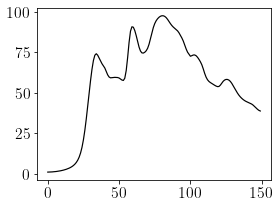

In [9]:
# -- Get Geometry
x,y = NS.T.x,NS.T.y
dx,dy = NS.T.dx, NS.T.dy
xx,yy = np.meshgrid(x,y,indexing="ij")

Nu = []
for T in NS.T.V:
    # -- Evaluate Nu
#T = NS.T.V[-1]

    Field = NS.deriv_field
    That = Field.forward(T)
    dThat = Field.derivative(That, 1, axis=1)
    dT = Field.backward(dThat)

    dTavg = avg_x(dT,Field.dx)
    Nu_bot = - dTavg[0]/0.5
    Nu_top = - dTavg[-1]/0.5
    #print("Nubot: {:6.2f}".format(Nu_bot))
    #print("Nutop: {:6.2f}".format(Nu_top))
    Nu.append((Nu_bot+Nu_top)/2.)
plt.plot(Nu)
plt.show()

/home/preiter/Python/pypde/pypde/plot/colors.py:26: UserWarning: Trying to register the cmap 'gfcmap' which already exists.
  plt.cm.register_cmap(name='gfcmap', cmap=gfcmap())


Save animation to out/anim.mp4


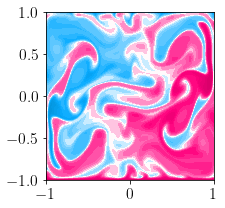

In [10]:
from IPython.display import HTML

#  Add inhomogeneous part
for i,v in enumerate(NS.T.V):
        if NS.T.V[i][0,0] < 0.1:
            NS.T.V[i] += NS.Tbc.v

anim = NS.T.animate(duration=4)
anim.save('out/anim.gif', writer='imagemagick', fps=20)
HTML(anim.to_jshtml())

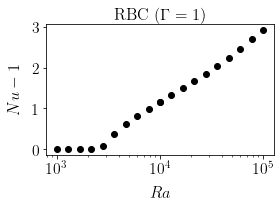

In [38]:
fig,ax = plt.subplots()
ax.scatter(Ra,Nu)
ax.set_xscale("log")
ax.set_ylabel(r"$Nu-1$")
ax.set_xlabel(r"$Ra$")
ax.set_title(r"RBC ($\Gamma=1$)")
fig.savefig("out/Nu.png")
plt.show()

In [7]:
Ra = np.loadtxt("Ra.txt")
Nu = np.loadtxt("Nu.txt")

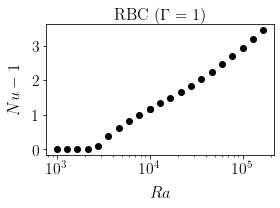

In [66]:
fig,ax = plt.subplots()
ax.scatter(Ra,Nu)
ax.set_xscale("log")
ax.set_ylabel(r"$Nu-1$")
ax.set_xlabel(r"$Ra$")
ax.set_title(r"RBC ($\Gamma=1$)")
fig.savefig("out/Nu.png")
plt.show()

In [6]:
data_gf = np.loadtxt("/scratch21/preiter/sidebc_xuan/backup/pr1.0/rbc/Nu.txt")
Ra_gf = data_gf[:,0]
Nu_gf = data_gf[:,4]
Ra_gf

array([1.00e+03, 1.00e+04, 1.00e+05, 1.00e+06, 1.00e+07, 1.00e+08,
       1.00e+09, 2.15e+03, 2.15e+04, 2.15e+05, 2.15e+06, 2.15e+07,
       2.15e+08, 2.15e+09, 3.16e+03, 4.64e+03, 4.64e+04, 4.64e+05,
       4.64e+06, 4.64e+07, 4.64e+08, 4.64e+09])

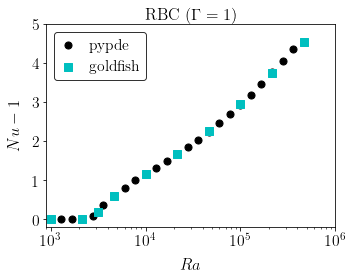

In [27]:
fig,ax = plt.subplots(figsize=(5,4))
ax.scatter(Ra,Nu,label="pypde",color="k",marker="o",s=50)
ax.scatter(Ra_gf,Nu_gf-1,label="goldfish",color="c",marker="s",s=50)
ax.set_xscale("log")
ax.set_ylabel(r"$Nu-1$")
ax.set_xlabel(r"$Ra$")
ax.set_title(r"RBC ($\Gamma=1$)")
ax.set_xlim([9e2,1e6])
ax.set_ylim([-0.2,5])
ax.legend(loc="upper left")
fig.savefig("out/Nu_pypde_vs_goldfish.png")
plt.show()

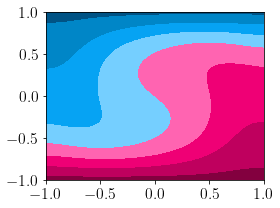

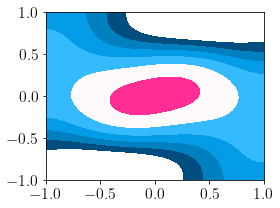

In [5]:
T = NS.T.V[-1]

Field = NS.deriv_field
That = Field.forward(T)
dThat = Field.derivative(That, 1, axis=1)
dT = Field.backward(dThat)

plt.contourf(xx,yy,T)
plt.show()
levels = np.linspace(-1,1,10)
plt.contourf(xx,yy,dT,levels=levels)
plt.show()

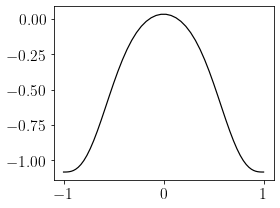

In [7]:
def avg_x(f,dx):
    return np.sum(f*dx[:,None],axis=0)/np.sum(dx)
dTavg = avg_x(dT,Field.dx)
plt.plot(y,dTavg)
plt.show()

In [13]:
Nu_bot = - dTavg[0]/0.5
Nu_top = - dTavg[-1]/0.5
print("Nubot: {:6.2f}".format(Nu_bot))
print("Nutop: {:6.2f}".format(Nu_top))

Nubot:   2.16
Nutop:   2.16


In [9]:
dTdz = grad(NS.T.field,deriv=(0,1),return_field=True)
dTdz.vhat += grad(NS.T.fieldbc,deriv=(0,1),return_field=False)
dTdz.backward()

NS.T.field.backward()
NS.V.field.backward()

uzT = NS.T.field.v*NS.V.field.v

Nu = 1/kappa*uzT - dTdz.v

xx,yy = np.meshgrid(NS.T.field.x,NS.T.field.y,indexing="ij")
plt.contourf(xx,yy,Nu)
plt.show()

plt.plot(NS.T.field.x, Nu[:,0])

AttributeError: 'Field' object has no attribute 'field'

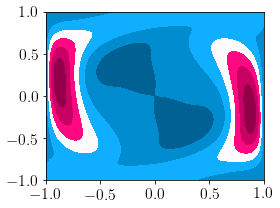

1.8486000909826696

In [137]:
Nu = np.zeros((NS.T.shape))
i=0

hist = []
for t,v in zip(NS.T.field.V,NS.V.field.V):    
    uzT = v*t
    dTdz = np.gradient(t,NS.T.field.y,axis=1)
    Nu = (Nu*i +  (uzT/kappa - dTdz))/(i+1)

    hist.append(np.sum(Nu[1:,0]*dx[:])/np.sum(dx))
    i+=1
    
#Nu = Nu/i
plt.contourf(xx,yy,Nu)
plt.show()

np.sum(Nu[1:,0]*dx[:])/np.sum(dx)

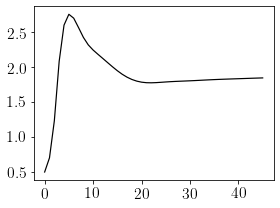

In [138]:
plt.plot(hist)

In [136]:
x = NS.T.field.x
dx = np.diff(x)
dx.shape

np.sum(Nu[1:,0]*dx[:])/np.sum(dx)

1.9444025248835684

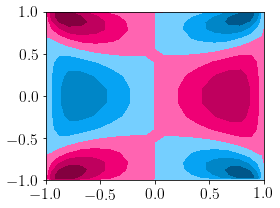

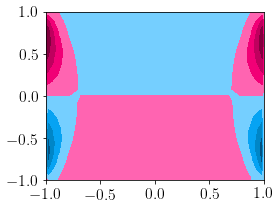

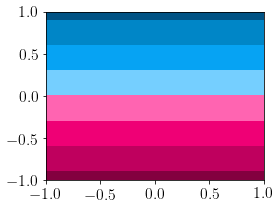

In [24]:
xx,yy = np.meshgrid(NS.T.field.x,NS.T.field.y,indexing="ij")

NS.V.field.backward()
NS.U.field.backward()
plt.contourf(xx,yy,NS.U.field.v)
plt.show()

plt.contourf(xx,yy,NS.V.field.v)
plt.show()

plt.contourf(xx,yy,NS.T.field.v)
plt.show()

In [2]:

xbase = Base(shape[0],"CN")
ybase = Base(shape[1],"CD")
    
T  = Temperature(shape=shape)
ux = Field([xbase,ybase])
uz = Field([xbase,ybase])

x,y = T.field.x, T.field.y
xx,yy = np.meshgrid(x,y,indexing="ij")

m,n = 1,1
ux.v =  2*np.cos(0.5*m*np.pi*xx)*np.sin(1.0*n*np.pi*yy)
uz.v = -2*np.sin(1.0*m*np.pi*xx)*np.cos(0.5*n*np.pi*yy)



In [3]:
#%%time
D = Temperature(shape=shape,dt=0.002,tsave=0.5,kappa=0.01)
D.iterate(5.0,ux_field = ux.v, uz_field=uz.v)

Time: 0.500
Time: 1.000
Time: 1.500
Time: 2.000
Time: 2.500
Time: 3.000
Time: 3.500
Time: 4.000
Time: 4.500
Time: 5.000
